In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL
import os
import cv2
from os.path import join
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from PIL import Image

In [2]:
dataset_path = "lfwdataset"
all_files = os.listdir(dataset_path)
x = np.ones((len(all_files),4096))

for i in range(len(all_files)):
    image = PIL.Image.open(join(dataset_path, all_files[i]))
    image = np.array(image)
    x[i] = image.ravel()

In [19]:
# Apply PCA and get PVE values
k = [16,32,64,128,256,512,1024,2048,4096]
variance_ratios = []
for i in k:
    pca = PCA(i)
    covariance = pca.fit_transform(x)
    variance_ratios.append(np.sum(pca.explained_variance_ratio_)) 

[0.7174532595352481, 0.8038657391339594, 0.8823767228309983, 0.9413179444873445, 0.9783784893751633, 0.9956126193446547, 0.9999999999999999, 0.9999999999999999, 0.9999999999999999]


Text(0.5, 1.0, 'Variance vs Number of Principal Components')

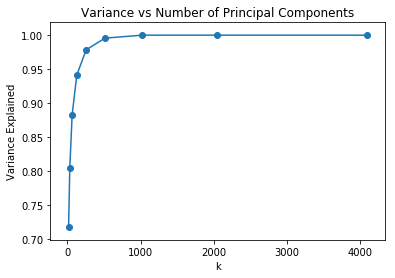

In [28]:
plt.plot( np.transpose(k), variance_ratios)
plt.scatter(np.transpose(k), variance_ratios)
plt.ylabel("Variance Explained")
plt.xlabel("k")
plt.title("Variance vs Number of Principal Components")

In [5]:
# Draw original images of first 6 people

samples = ["Aaron_Eckhart_0001.pgm",
"Aaron_Guiel_0001.pgm",
"Aaron_Patterson_0001.pgm",
"Aaron_Peirsol_0001.pgm",
"Aaron_Pena_0001.pgm",
"Aaron_Sorkin_0001.pgm"]

In [6]:
for s in samples:
    image = PIL.Image.open(join(dataset_path, s))
    image.save(s[:-4] + ".png")

In [7]:
# Draw reconstructed
samples_idx = [0,1,2,3,7,8]
k_set = [32,128,512]

for k in k_set:
    # Apply PCA
    pca = PCA(k)
    covariance = pca.fit_transform(x)
    
    # To reconstruct the images, do inverse transform
    proj = pca.inverse_transform(covariance)
    for i in samples_idx:
        new_im = Image.fromarray(np.uint8(np.reshape(proj[i],(64,64))), 'L')
        new_im.save(str(i) + '_' + str(k) + '.png')

(1000, 32)
(1000, 4096)
(1000, 128)
(1000, 4096)
(1000, 512)
(1000, 4096)


In [14]:
# First 6 eigen faces
pca = PCA(6)
pca.fit(x)
covariance = pca.transform(x) 
print(np.shape(pca.components_))
eigen_faces = pca.components_

for i in range(6):
    plt.imsave('eigen_face' + str(i) + '.png', eigen_faces[i].reshape(64,64), cmap='gray')

(6, 4096)


In [38]:
pca = PCA(146)
covariance = pca.fit_transform(x)
np.sum(pca.explained_variance_ratio_)

0.95014111366107